## lecture

### sess.run()

In [1]:
import tensorflow as tf

C:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
node1 = tf.constant(30.0, tf.float32)
node2 = tf.constant(35.0)
node3 = tf.add(node1, node2)
x = tf.constant(30.0, tf.float32)
y = tf.constant(35.0)
xy= tf.add(x, y)

In [6]:
print(xy)

Tensor("Add_3:0", shape=(), dtype=float32)


In [4]:
print("node1 : ", node1, "node2 : ", node2)
print(node3)

node1 :  Tensor("Const:0", shape=(), dtype=float32) node2 :  Tensor("Const_1:0", shape=(), dtype=float32)
Tensor("Add:0", shape=(), dtype=float32)


In [7]:
sess=tf.Session()

In [8]:
sess.run(node3)

65.0

In [9]:
sess.run(xy)

65.0

### placeholder

In [12]:
x =tf.placeholder(tf.float32)
y =tf.placeholder(tf.float32)
add_xy= x+y

In [13]:
print(sess.run(add_xy,feed_dict={x:1, y:2}))
print(sess.run(add_xy, feed_dict={x:[3,4, 5, 6], y:[2,2, 2, 2]}))

3.0
[5. 6. 7. 8.]


In [15]:
print(sess.run(add_xy, feed_dict={x:[3,4,5,5], y:[1, 1, 2, 2]}))

[4. 5. 7. 7.]


### linear regression

In [16]:
# 1

x_train = [1,2,3,4]
y_train = [3,5,7, 8]

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x_train*W + b

cost = tf.reduce_mean(tf.square(hypothesis - y_train))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

train = optimizer.minimize(cost)

ses = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(201) :
    sess.run(train)
    if step % 20 ==0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 10.2811165 [1.0408679] [0.03928581]
20 0.26365948 [2.028215] [0.4470767]
40 0.23640327 [2.0336633] [0.5167133]
60 0.2181569 [2.0148778] [0.5741619]
80 0.20197706 [1.9965667] [0.6280561]
100 0.18762577 [1.9793054] [0.6788079]
120 0.17489648 [1.9630485] [0.72660565]
140 0.16360602 [1.9477376] [0.7716212]
160 0.15359154 [1.933318] [0.81401664]
180 0.14470907 [1.9197376] [0.8539445]
200 0.13683029 [1.9069477] [0.8915482]


In [2]:
# 2 Linear Regression

import tensorflow as tf
tf.set_random_seed(123)  # for reproducibility

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# Try to find values for W and b to compute y_data = x_data * W + b
# We know that W should be 1 and b should be 0
# But let TensorFlow figure it out
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

## cost is fluctuate depand on range 

# Fit the line
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))


0 16.596735 [-1.3112017] [1.0119141]
20 0.52312356 [0.1385625] [1.5543306]
40 0.3431858 [0.3067499] [1.5374595]
60 0.31049073 [0.35148993] [1.4705536]
80 0.28198195 [0.38312528] [1.4019526]
100 0.25610045 [0.41222638] [1.3361145]
120 0.2325946 [0.43985996] [1.2733269]
140 0.21124609 [0.4661854] [1.2134857]
160 0.19185714 [0.49127284] [1.1564564]
180 0.1742477 [0.51518124] [1.102107]
200 0.15825453 [0.53796583] [1.0503122]


In [3]:
# 3. Minimizing Cost

import tensorflow as tf
import matplotlib.pyplot as plt
tf.set_random_seed(123)  # for reproducibility

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()

# Variables for plotting cost function
W_history = []
cost_history = []

for i in range(-30, 50):
    curr_W = i * 0.1
    curr_cost = sess.run(cost, feed_dict={W: curr_W})
    W_history.append(curr_W)
    cost_history.append(curr_cost)

# Show the cost function
plt.plot(W_history, cost_history)
plt.show()



<Figure size 640x480 with 1 Axes>

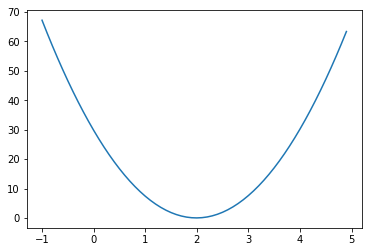

In [24]:
# Minimizing Cost assume y=2x

import tensorflow as tf
import matplotlib.pyplot as plt

tf.set_random_seed(123)  # for reproducibility

X = [1, 2, 3, 4]
Y = [2.1, 3.9, 6.1, 7.9]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Variables for plotting cost function
W_val = []
cost_val = []

for i in range(-10, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

In [25]:
W_val

[array(-1., dtype=float32),
 array(-0.9, dtype=float32),
 array(-0.8, dtype=float32),
 array(-0.7, dtype=float32),
 array(-0.6, dtype=float32),
 array(-0.5, dtype=float32),
 array(-0.4, dtype=float32),
 array(-0.3, dtype=float32),
 array(-0.2, dtype=float32),
 array(-0.1, dtype=float32),
 array(0., dtype=float32),
 array(0.1, dtype=float32),
 array(0.2, dtype=float32),
 array(0.3, dtype=float32),
 array(0.4, dtype=float32),
 array(0.5, dtype=float32),
 array(0.6, dtype=float32),
 array(0.7, dtype=float32),
 array(0.8, dtype=float32),
 array(0.9, dtype=float32),
 array(1., dtype=float32),
 array(1.1, dtype=float32),
 array(1.2, dtype=float32),
 array(1.3, dtype=float32),
 array(1.4, dtype=float32),
 array(1.5, dtype=float32),
 array(1.6, dtype=float32),
 array(1.7, dtype=float32),
 array(1.8, dtype=float32),
 array(1.9, dtype=float32),
 array(2., dtype=float32),
 array(2.1, dtype=float32),
 array(2.2, dtype=float32),
 array(2.3, dtype=float32),
 array(2.4, dtype=float32),
 array(2.5, dt

0 -2.0100002 480.80997
1 3.9950004 120.20976
2 0.9924998 30.059698
3 2.49375 7.5221744
4 1.743125 1.8877937
5 2.1184375 0.4791984
6 1.9307812 0.12704957
7 2.0246093 0.039012402
8 1.9776953 0.017003058
9 2.0011523 0.011500759
10 1.9894239 0.010125155
11 1.995288 0.00978127
12 1.992356 0.009695297
13 1.993822 0.009673806
14 1.9930891 0.009668446
15 1.9934555 0.009667103
16 1.9932722 0.009666753
17 1.993364 0.009666684
18 1.993318 0.009666648
19 1.9933411 0.009666657


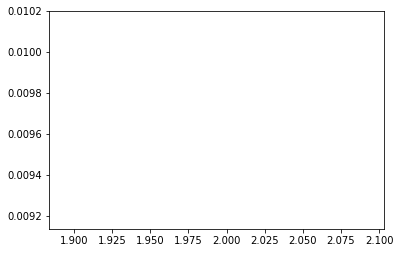

In [17]:
# 4. Minimizing Cost assume y=2x

import tensorflow as tf
import matplotlib.pyplot as plt

tf.set_random_seed(123)  # for reproducibility

X = [1, 2, 3, 4]
Y = [2.1, 3.9, 6.1, 7.9]

W = tf.placeholder(tf.float32)

# Set wrong model weights
W = tf.Variable(10.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch the graph in a session
W_val = []
cost_val = []

with tf.Session() as sess:
        
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())
 
    for step in range(20):
        _, W_val,cost_val = sess.run([train, W, cost])
        print(step, W_val, cost_val)
                
plt.plot(W_val, cost_val)
plt.show()

## below error
# sess.run(tf.global_variables_initializer())
# W_val = []
# cost_val = []
  
# for i in range(-30, 50):
#    feed_W = i * 0.1
#    _, curr_W, curr_cost = sess.run([train, W, cost], feed_dict={W: feed_W})
#    W_val.append(curr_W)
#    cost_val.append(curr_cost)
#    print(step, W_val, cost_val)

    # Show the cost function
# plt.plot(W_val, cost_val)
# plt.show()

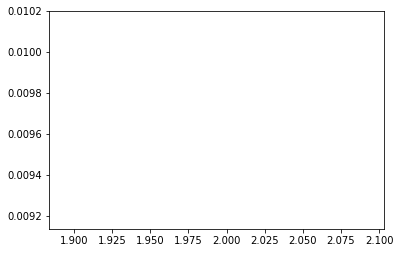

In [8]:
plt.plot(W_val, cost_val)

In [10]:
plt.show()

0 [-2.0100002] [480.80997]


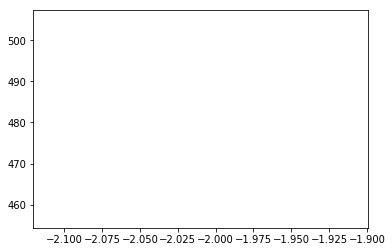

1 [-2.0100002, 3.9950004] [480.80997, 120.20976]


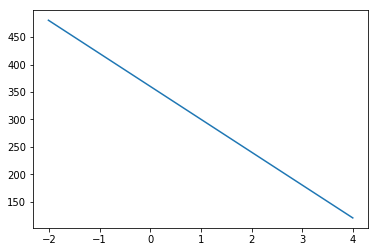

2 [-2.0100002, 3.9950004, 0.9924998] [480.80997, 120.20976, 30.059698]


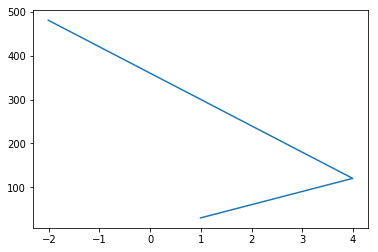

3 [-2.0100002, 3.9950004, 0.9924998, 2.49375] [480.80997, 120.20976, 30.059698, 7.5221744]


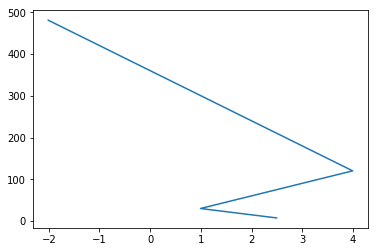

4 [-2.0100002, 3.9950004, 0.9924998, 2.49375, 1.743125] [480.80997, 120.20976, 30.059698, 7.5221744, 1.8877937]


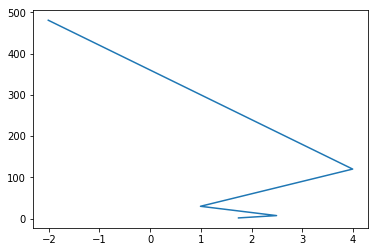

5 [-2.0100002, 3.9950004, 0.9924998, 2.49375, 1.743125, 2.1184375] [480.80997, 120.20976, 30.059698, 7.5221744, 1.8877937, 0.4791984]


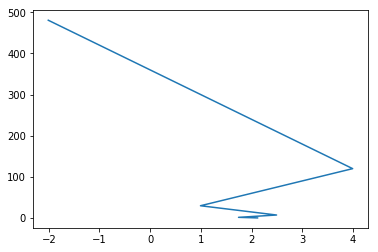

6 [-2.0100002, 3.9950004, 0.9924998, 2.49375, 1.743125, 2.1184375, 1.9307812] [480.80997, 120.20976, 30.059698, 7.5221744, 1.8877937, 0.4791984, 0.12704957]


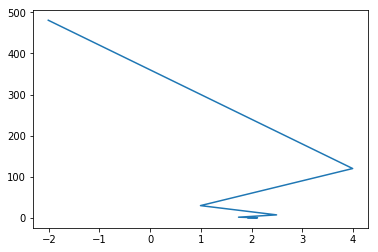

7 [-2.0100002, 3.9950004, 0.9924998, 2.49375, 1.743125, 2.1184375, 1.9307812, 2.0246093] [480.80997, 120.20976, 30.059698, 7.5221744, 1.8877937, 0.4791984, 0.12704957, 0.039012402]


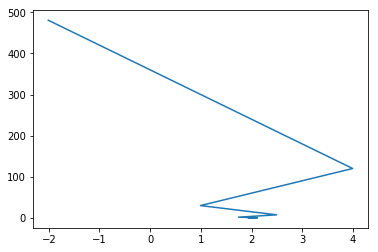

8 [-2.0100002, 3.9950004, 0.9924998, 2.49375, 1.743125, 2.1184375, 1.9307812, 2.0246093, 1.9776953] [480.80997, 120.20976, 30.059698, 7.5221744, 1.8877937, 0.4791984, 0.12704957, 0.039012402, 0.017003058]


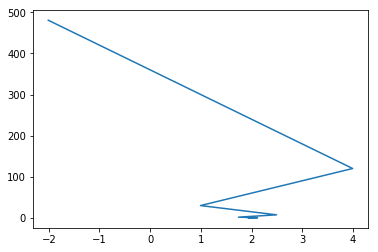

9 [-2.0100002, 3.9950004, 0.9924998, 2.49375, 1.743125, 2.1184375, 1.9307812, 2.0246093, 1.9776953, 2.0011523] [480.80997, 120.20976, 30.059698, 7.5221744, 1.8877937, 0.4791984, 0.12704957, 0.039012402, 0.017003058, 0.011500759]


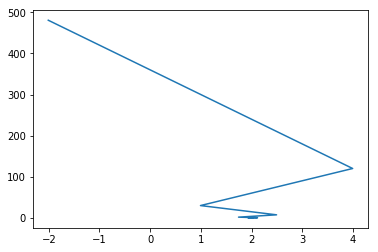

In [18]:
# 5.  Minimizing Cost assume y=2x

import tensorflow as tf
import matplotlib.pyplot as plt

tf.set_random_seed(123)  # for reproducibility

X = [1, 2, 3, 4]
Y = [2.1, 3.9, 6.1, 7.9]

W = tf.placeholder(tf.float32)

# Set wrong model weights
W = tf.Variable(10.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch the graph in a session

with tf.Session() as sess:
        
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())
    
    W_val = []
    cost_val = []


    for step in range(10):
        
        _, curr_W, curr_cost = sess.run([train, W, cost])
        W_val.append(curr_W)
        cost_val.append(curr_cost)      
        print(step, W_val, cost_val)
        
        # Show the cost function
        
        plt.plot(W_val, cost_val)
        plt.show()
 

In [19]:
# 6. Multi-variable linear regression

import tensorflow as tf
tf.set_random_seed(123)  # for reproducibility

x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]


# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(201):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


0 Cost:  2534.4897 
Prediction:
 [[198.03032]
 [237.12991]
 [234.27734]
 [253.2541 ]
 [182.15056]]
10 Cost:  1.4064103 
Prediction:
 [[153.50365]
 [183.61969]
 [181.54889]
 [195.83482]
 [141.33705]]
20 Cost:  1.3776896 
Prediction:
 [[153.36491]
 [183.46048]
 [181.38808]
 [195.66039]
 [141.2169 ]]
30 Cost:  1.3722026 
Prediction:
 [[153.36055]
 [183.4627 ]
 [181.38635]
 [195.65918]
 [141.21992]]
40 Cost:  1.3667405 
Prediction:
 [[153.35657]
 [183.46541]
 [181.38512]
 [195.65851]
 [141.22328]]
50 Cost:  1.3613062 
Prediction:
 [[153.3526 ]
 [183.4681 ]
 [181.38387]
 [195.6578 ]
 [141.22664]]
60 Cost:  1.3559083 
Prediction:
 [[153.34865]
 [183.47078]
 [181.38263]
 [195.65714]
 [141.22997]]
70 Cost:  1.3505478 
Prediction:
 [[153.34473]
 [183.47345]
 [181.3814 ]
 [195.65645]
 [141.2333 ]]
80 Cost:  1.3451868 
Prediction:
 [[153.34079]
 [183.47614]
 [181.38016]
 [195.65578]
 [141.23663]]
90 Cost:  1.3398789 
Prediction:
 [[153.33687]
 [183.4788 ]
 [181.37895]
 [195.6551 ]
 [141.23994]]
1

In [2]:
tf.shape(x_data)

<tf.Tensor 'Shape:0' shape=(2,) dtype=int32>

In [3]:
tf.shape(W)

<tf.Tensor 'Shape_1:0' shape=(2,) dtype=int32>

## error

In [20]:
# 7. Multi-variable linear regression 

import tensorflow as tf
import numpy as np
tf.set_random_seed(123)  # for reproducibility

# xy = np.loadtxt('c:\\anaconda\pytfworks\data-01-test-score.csv', delimiter=',', dtype=np.float32)
xy = np.loadtxt('c:/anaconda\pytfworks/air-pax2.csv', delimiter=',', dtype=np.float32)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print(x_data.shape, x_data, len(x_data))
print(y_data.shape, y_data)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(201):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

# Ask my score
print("Your score will be ", sess.run(
    hypothesis, feed_dict={X: [[100, 70, 101]]}))

print("Other scores will be ", sess.run(hypothesis,
                                        feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))


(60, 2) [[  1. 100.]
 [  2. 100.]
 [  3. 100.]
 [  4. 100.]
 [  5. 100.]
 [  6. 100.]
 [  7. 100.]
 [  8. 100.]
 [  9. 100.]
 [ 10. 100.]
 [ 11. 100.]
 [ 12. 100.]
 [ 13. 100.]
 [ 14. 100.]
 [ 15. 100.]
 [ 16. 100.]
 [ 17. 100.]
 [ 18. 100.]
 [ 19. 100.]
 [ 20. 100.]
 [ 21. 100.]
 [ 22. 100.]
 [ 23. 100.]
 [ 24. 100.]
 [ 25. 100.]
 [ 26. 100.]
 [ 27. 100.]
 [ 28. 100.]
 [ 29. 100.]
 [ 30. 100.]
 [ 31. 100.]
 [ 32. 100.]
 [ 33. 100.]
 [ 34. 100.]
 [ 35. 100.]
 [ 36. 100.]
 [ 37. 100.]
 [ 38. 100.]
 [ 39. 100.]
 [ 40. 100.]
 [ 41. 100.]
 [ 42. 100.]
 [ 43. 100.]
 [ 44. 100.]
 [ 45. 100.]
 [ 46. 100.]
 [ 47. 100.]
 [ 48. 100.]
 [ 49. 100.]
 [ 50. 100.]
 [ 51. 100.]
 [ 52. 100.]
 [ 53. 100.]
 [ 54. 100.]
 [ 55. 100.]
 [ 56. 100.]
 [ 57. 100.]
 [ 58. 100.]
 [ 59. 100.]
 [ 60. 100.]] 60
(60, 1) [[2970.]
 [2600.]
 [3290.]
 [3010.]
 [3250.]
 [3760.]
 [3800.]
 [3920.]
 [3230.]
 [3170.]
 [3040.]
 [3530.]
 [3020.]
 [2900.]
 [4040.]
 [3360.]
 [3660.]
 [4380.]
 [4290.]
 [4540.]
 [3770.]
 [3630.]
 [

ValueError: Cannot feed value of shape (60, 2) for Tensor 'Placeholder_13:0', which has shape '(?, 3)'

In [21]:
# 8. Multi-variable linear regression with air-pax

import tensorflow as tf
import numpy as np
tf.set_random_seed(123)  # for reproducibility

# xy = np.loadtxt('c:\\anaconda\pytfworks\data-01-test-score.csv', delimiter=',', dtype=np.float32)

xy = np.loadtxt('c:/anaconda/pytfworks/air-pax2.csv', delimiter=',', dtype=np.float32)

x_data = xy[:, 0:-1]
# x_data = xy[:, [0]]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK

print(x_data.shape, x_data, len(x_data))
print(y_data.shape, y_data)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
# hypothesis = tf.matmul(X, W) + b

hypothesis = X * W + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(201):
    cost_val, W_val, b_val = sess.run(
        [cost, W, b], feed_dict={X: x_data, Y: y_data})
    if step % 100 == 0:
        print(step, "Cost: ", cost_val,W_val, b_val)
        
          
      


(60, 2) [[  1. 100.]
 [  2. 100.]
 [  3. 100.]
 [  4. 100.]
 [  5. 100.]
 [  6. 100.]
 [  7. 100.]
 [  8. 100.]
 [  9. 100.]
 [ 10. 100.]
 [ 11. 100.]
 [ 12. 100.]
 [ 13. 100.]
 [ 14. 100.]
 [ 15. 100.]
 [ 16. 100.]
 [ 17. 100.]
 [ 18. 100.]
 [ 19. 100.]
 [ 20. 100.]
 [ 21. 100.]
 [ 22. 100.]
 [ 23. 100.]
 [ 24. 100.]
 [ 25. 100.]
 [ 26. 100.]
 [ 27. 100.]
 [ 28. 100.]
 [ 29. 100.]
 [ 30. 100.]
 [ 31. 100.]
 [ 32. 100.]
 [ 33. 100.]
 [ 34. 100.]
 [ 35. 100.]
 [ 36. 100.]
 [ 37. 100.]
 [ 38. 100.]
 [ 39. 100.]
 [ 40. 100.]
 [ 41. 100.]
 [ 42. 100.]
 [ 43. 100.]
 [ 44. 100.]
 [ 45. 100.]
 [ 46. 100.]
 [ 47. 100.]
 [ 48. 100.]
 [ 49. 100.]
 [ 50. 100.]
 [ 51. 100.]
 [ 52. 100.]
 [ 53. 100.]
 [ 54. 100.]
 [ 55. 100.]
 [ 56. 100.]
 [ 57. 100.]
 [ 58. 100.]
 [ 59. 100.]
 [ 60. 100.]] 60
(60, 1) [[2970.]
 [2600.]
 [3290.]
 [3010.]
 [3250.]
 [3760.]
 [3800.]
 [3920.]
 [3230.]
 [3170.]
 [3040.]
 [3530.]
 [3020.]
 [2900.]
 [4040.]
 [3360.]
 [3660.]
 [4380.]
 [4290.]
 [4540.]
 [3770.]
 [3630.]
 [

In [ ]:
x_data

In [19]:
x_data

array([[ 1.,  1.,  1.],
       [ 2.,  1.,  1.],
       [ 3.,  1.,  1.],
       [ 4.,  1.,  1.],
       [ 5.,  1.,  1.],
       [ 6.,  1.,  1.],
       [ 7.,  1.,  1.],
       [ 8.,  1.,  1.],
       [ 9.,  1.,  1.],
       [10.,  1.,  1.],
       [11.,  1.,  1.],
       [12.,  1.,  1.],
       [13.,  1.,  1.],
       [14.,  1.,  1.],
       [15.,  1.,  1.],
       [16.,  1.,  1.]], dtype=float32)

## logistic : result depend on range ( 101 or 1001)

In [23]:
# 9. Logistic Regression Classifier

import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(1001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)


0 4.1288595
200 0.7735352
400 0.60749835
600 0.53494084
800 0.49556622
1000 0.46919167

Hypothesis:  [[0.27917683]
 [0.2975562 ]
 [0.7215453 ]
 [0.61488354]
 [0.7560809 ]
 [0.91439945]] 
Correct (Y):  [[0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  0.8333333


In [9]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\gwihy\ML_01


## np.loadtxt, caution : header  

In [16]:
# 9-1  use csv file 

import tensorflow as tf
import numpy as np

tf.set_random_seed(123)  # for reproducibility

# xy = np.loadtxt('c:/anaconda/pytfworks/air-pax2.csv', delimiter=',', dtype=np.float32)

xy = np.loadtxt('c:/R/work_r/source/10_logistic_3.csv', delimiter=',', dtype=np.float32)
 

x_data = xy[:, 0:-2]

# x_data = xy[:, [0]]
# y_data = xy[:, [-1]]

y_data = xy[:, [2]]

# Make sure the shape and data are OK

print(x_data.shape, x_data, len(x_data))
print(y_data.shape, y_data)


(325, 2) [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [17]:
# 9-2  : continued from 9-1  

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(1001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)





0 1.4775945
200 1.0768055
400 0.80716646
600 0.66688704
800 0.6037851
1000 0.5734428

Hypothesis:  [[0.504056  ]
 [0.504056  ]
 [0.504056  ]
 [0.504056  ]
 [0.504056  ]
 [0.504056  ]
 [0.504056  ]
 [0.504056  ]
 [0.504056  ]
 [0.5166272 ]
 [0.5166272 ]
 [0.5166272 ]
 [0.5166272 ]
 [0.5166272 ]
 [0.25145322]
 [0.25145322]
 [0.25145322]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.24210274]
 [0.504056  ]
 [0.504056  ]
 [0.504056  ]
 [0.5166272 ]
 [0.5166272 ]
 [0.5166272 ]
 [0.5166272 ]
 [0.5166272 ]
 [0.5166272 ]
 [0.504056  ]
 [0.5

## Softmax

In [1]:
# 10. Softmax Classifier

import tensorflow as tf
tf.set_random_seed(123)  # for reproducibility

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
            _, cost_val = sess.run([optimizer, cost], feed_dict={X: x_data, Y: y_data})

            if step % 200 == 0:
                print(step, cost_val)

    print('--------------')
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))

    print('--------------')
    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.argmax(b, 1)))

    print('--------------')
    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.argmax(c, 1)))

    print('--------------')
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))

C:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


0 3.5972338
200 0.5396633
400 0.45574337
600 0.3840901
800 0.31461772
1000 0.24680433
1200 0.22134246
1400 0.20216055
1600 0.18589684
1800 0.17194694
2000 0.1598613
--------------
[[4.6871595e-02 9.5312017e-01 8.2049091e-06]] [1]
--------------
[[0.61087346 0.35316262 0.03596392]] [0]
--------------
[[1.0695100e-08 3.2874028e-04 9.9967122e-01]] [2]
--------------
[[4.6871595e-02 9.5312017e-01 8.2049091e-06]
 [6.1087346e-01 3.5316262e-01 3.5963919e-02]
 [1.0695100e-08 3.2874028e-04 9.9967122e-01]] [1 0 2]


In [24]:
# 11. Softmax Classifier

import tensorflow as tf
import numpy as np
tf.set_random_seed(123)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('c:\\anaconda\pytfworks\data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6

Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot

print("one_hot", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("reshape", Y_one_hot)

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                 labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(200):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={
                                 X: x_data, Y: y_data})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))

    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_data})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))


(101, 16) (101, 1)
one_hot Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)
reshape Tensor("Reshape:0", shape=(?, 7), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Step:     0	Loss: 6.578	Acc: 1.98%
Step:   100	Loss: 0.729	Acc: 78.22%
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Predi

In [2]:
x_data

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.]], dtype=float32)

In [3]:
x_data.flatten()

array([1., 0., 0., ..., 1., 0., 0.], dtype=float32)